# Hate_speech_classifier
Special thanks to VidyaAnalytica tutorials for this excercise.

# Problem Statement
To detect hate/racism content in tweets

### Evaluation Metric

F1 score is being used as the evaluation metric. 

It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

The important components of F1 score are:

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
False Positives (FP) – When actual class is no and predicted class is yes.
False Negatives (FN) – When actual class is yes but predicted class in no.
Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2(Recall Precision) / (Recall + Precision)

# 1)- Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

In [3]:
pd.set_option("display.max_colwidth", 200)
%matplotlib inline

# 2) Loading Dataset

In [4]:
train  = pd.read_csv('train_E6oV3lV.csv')

In [5]:
train.shape

(31962, 3)

In [6]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [7]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

**0 means no hate speech and 1 means that document contains hate content**

In [8]:
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [9]:
test.shape

(17197, 2)

In [10]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


As we can see there is no labels. Through machine learning, we need to predict this test set and its label

## b) Data Inspection

In [11]:
#Let’s check out a few non racist/sexist tweets.

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [12]:
#check out a few racist/sexist tweets.

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


 we will check the distribution of length of the tweets, in terms of words, in both train and test data.

In [13]:
length_train = train['tweet'].str.len()
length_train[0:10]

0    102
1    122
2     21
3     86
4     39
5    116
6     74
7    143
8     87
9     50
Name: tweet, dtype: int64

In [14]:
length_test = test['tweet'].str.len() 
length_test[:10]

0     90
1    101
2     71
3    142
4     93
5     27
6     92
7     85
8    108
9     66
Name: tweet, dtype: int64

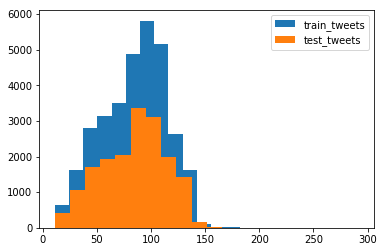

In [15]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

# 3) Text Cleaning

We can separately do cleaning or we can combine test and train and complete cleaning part.

In [16]:
combi = train.append(test, ignore_index=True, sort=False) 
combi.shape

(49159, 3)

In [17]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


## 3.1-remove unwanted text patterns

In [18]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

- We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

- We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.

- Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.

- Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.

## 3.2) Removing Twitter Handles (@user)
Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [19]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [20]:
combi['tidy_tweet'][0]

'  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [21]:
combi['tidy_tweet'][1]

"  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

## 3.3) Removing Punctuations, Numbers, and Special Characters
Here we will replace everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [22]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [23]:
combi['tidy_tweet'][0]

'  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run'

In [24]:
combi['tidy_tweet'][1]

'  thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked'

## 3.4) Removing Short Words
We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [25]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [26]:
combi['tidy_tweet'][0]

'when father dysfunctional selfish drags kids into dysfunction #run'

In [27]:
combi['tidy_tweet'][1]

'thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked'

## 3.5) Text Normalization
Here we will use nltk’s WordNetLemmatizer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [28]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [29]:
print(tokenized_tweet[0])

['when', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'into', 'dysfunction', '#run']


In [30]:
print(tokenized_tweet[1])

['thanks', '#lyft', 'credit', 'cause', 'they', 'offer', 'wheelchair', 'vans', '#disapointed', '#getthanked']


In [31]:
import nltk
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemm.lemmatize(i) for i in x])

In [32]:
print(tokenized_tweet[0])

['when', 'father', 'dysfunctional', 'selfish', 'drag', 'kid', 'into', 'dysfunction', '#run']


In [33]:
print(tokenized_tweet[1])

['thanks', '#lyft', 'credit', 'cause', 'they', 'offer', 'wheelchair', 'van', '#disapointed', '#getthanked']


In [34]:
print(tokenized_tweet[5])

['huge', 'fare', 'talking', 'before', 'they', 'leave', 'chaos', 'dispute', 'when', 'they', 'there', '#allshowandnogo']


Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

In [35]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [36]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drag kid into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair van #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


**We can do all in one step as well**

In [37]:
from nltk.corpus import stopwords
tweets = [] # defining corpus
for i in range(0, len(combi['tweet'])): # giving range of values from 0 to 1000
    tweet = re.sub('[^a-zA-Z]', ' ', combi['tweet'][i]) # using i for all values instead of 1 column
    tweet = tweet.lower()
    tweet = tweet.split()
    lemm = WordNetLemmatizer()
    stopword_set = set(stopwords.words('english'))
    tweet = [lemm.lemmatize(word) for word in tweet if not word in stopword_set]
    tweet = ' '.join(tweet)
    tweets.append(tweet) # finally attach all these cleaned values to corpus directory

In [38]:
# Remove characters which have length less than 3 
tweets_len = [word for word in tweets if len(word) > 3]

In [39]:
# Remove numbers
cleaned_data = [word for word in tweets_len if not word.isnumeric()]  

In [40]:
type(cleaned_data)

list

In [41]:
# convert to series to check words
tweets_corpus = pd.Series(cleaned_data)

In [42]:
combi['cleaned'] = tweets_corpus
combi.head()

,id,label,tweet,tidy_tweet,cleaned
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drag kid into dysfunction #run,user father dysfunctional selfish drag kid dysfunction run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair van #disapointed #getthanked,user user thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked
2,3,0.0,bihday your majesty,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time,model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,factsguide society motivation


In [43]:
print(combi['cleaned'][0])
combi['tidy_tweet'][0]

user father dysfunctional selfish drag kid dysfunction run


'when father dysfunctional selfish drag kid into dysfunction #run'

In [44]:
print(combi['cleaned'][1])
combi['tidy_tweet'][1]

user user thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked


'thanks #lyft credit cause they offer wheelchair van #disapointed #getthanked'

In [45]:
print(combi['cleaned'][5])
combi['tidy_tweet'][5]


huge fan fare big talking leave chaos pay dispute get allshowandnogo


'huge fare talking before they leave chaos dispute when they there #allshowandnogo'

They are good and similar in word content. In 2nd attempt, we didn't remove user and we did actually remove #. So we have some differences. It was just to check if all significant changes are made. We will use round1 effort for further analysis

# 4) Visualization from Tweets

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

- What are the most common words in the entire dataset?
- What are the most common words in the dataset for negative and positive tweets, respectively?
- How many hashtags are there in a tweet?
- Which trends are associated with my dataset?
- Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

## 4.1) Understanding the common words used in the tweets: WordCloud

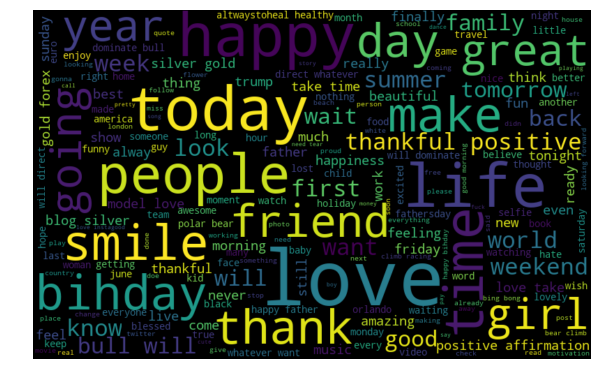

In [46]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## b)Words in non racist/sexist tweets

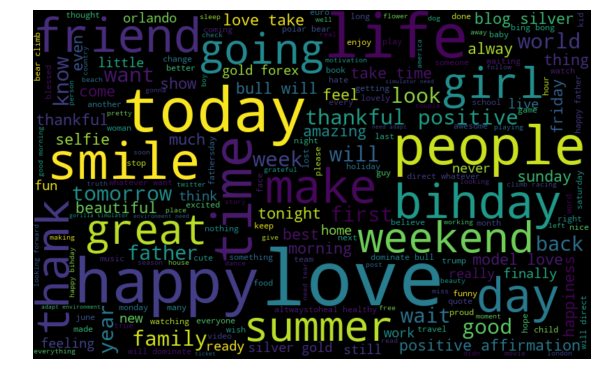

In [47]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## c) Racist/Sexist Tweets

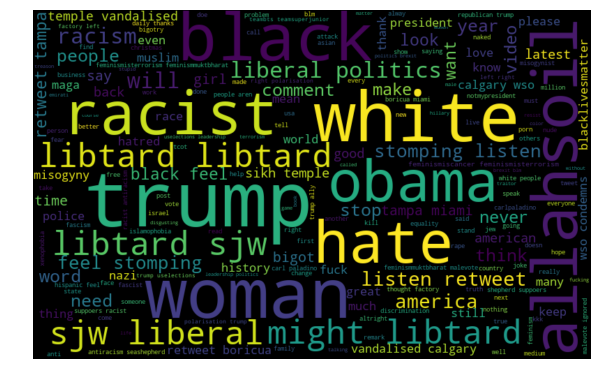

In [48]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## d) Hashtags on tweets sentiment
Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

In [49]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [50]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

In [51]:
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

In [52]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

### 4.2 Non-Racist/Sexist Tweets with  top n hashtags

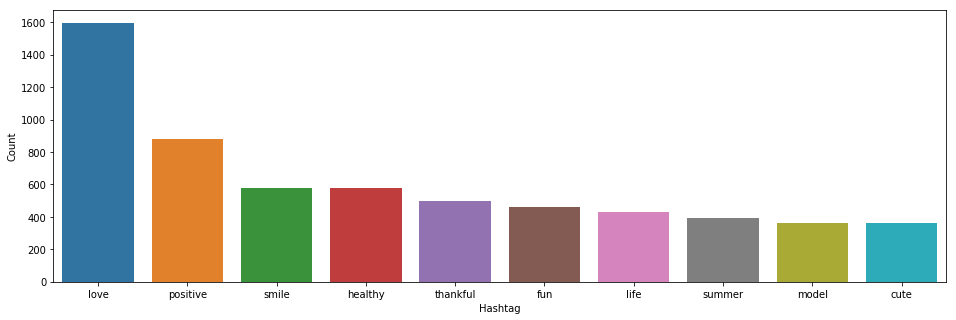

In [53]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

### 4.3-Racist/Sexist Tweets with  top n hashtags

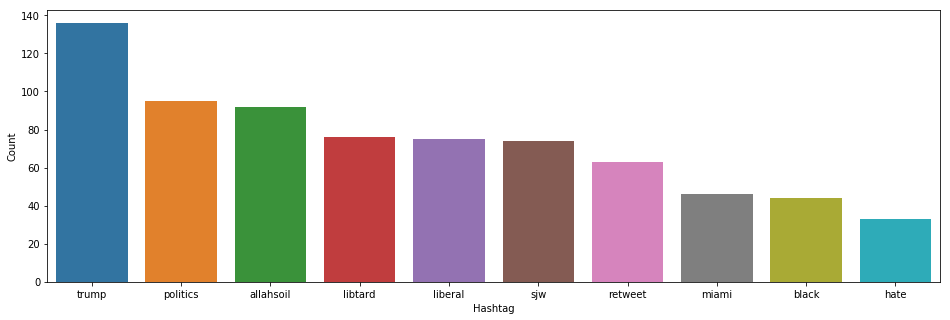

In [54]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# 5)- Bag-of-Words Features
Bag-of-Words is a method to represent text into numerical features. 

Let us understand this using a simple example. Suppose we have only 2 document

D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The list created would consist of all the unique tokens in the corpus C.

= [‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus

## 5.1 CountVector

In [56]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [57]:
bow.shape

(49159, 1000)

## 5.2 ) TF-IDF
This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [58]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [59]:
tfidf.shape

(49159, 1000)

## 5.3) Word2Vec Embedding
Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus.

They are able to achieve tasks like King -man +woman = Queen

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:

- Google News Word Vectors

- Freebase names

- DBPedia vectors (wiki2vec)

However, for this excercise, we will train our own word vectors since size of the pre-trained word vectors is generally huge.

In [60]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6483893, 7536020)

Let’s play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [61]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.5928120613098145),
 ('decorating', 0.592798113822937),
 ('#avocado', 0.5863513350486755),
 ('desse', 0.5790455341339111),
 ('cookout', 0.5747771263122559),
 ('footie', 0.5741386413574219),
 ('gown', 0.5654802322387695),
 ('#toast', 0.5620583295822144),
 ('favs', 0.5615869760513306),
 ('#biall', 0.5590553283691406)]

In [62]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.560897946357727),
 ('#delegaterevolt', 0.5284504294395447),
 ('phony', 0.5237365961074829),
 ('unfavorability', 0.5226051807403564),
 ('unstable', 0.517423152923584),
 ('chopra', 0.506507933139801),
 ('jibe', 0.5059552192687988),
 ('irrefutable', 0.5052924156188965),
 ('hillary', 0.5048696994781494),
 ('tomlin', 0.5004028677940369)]

From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses **cosine similarity** to find out the most similar vectors (words).<br>

Let’s check the vector representation of any word from our corpus.

In [63]:
model_w2v.wv['food']

array([ 4.21634555e-01, -1.05166054e+00,  2.82063991e-01, -1.97485641e-01,
        2.83328369e-02, -6.03097439e-01, -3.94909918e-01, -8.82410228e-01,
       -3.49839330e-01, -3.05516571e-01,  2.39723355e-01, -5.19897223e-01,
       -4.20117795e-01,  2.19948396e-01, -3.17393452e-01,  2.03571498e-01,
        5.92470944e-01, -6.09942794e-01, -1.82908848e-02, -7.76664376e-01,
       -1.97320580e-01, -4.62649256e-01,  1.95576444e-01,  8.12180862e-02,
       -9.00616348e-02, -1.57832190e-01, -7.84217715e-01, -5.22064626e-01,
        1.63776606e-01, -3.38889565e-03, -9.26073045e-02, -5.22567391e-01,
       -7.55036592e-01, -4.76972818e-01, -3.14185053e-01, -1.50467828e-01,
       -4.04599935e-01, -7.05801770e-02, -3.31714213e-01,  3.97399724e-01,
        1.56191690e-02,  1.51507512e-01, -2.74983704e-01, -7.37916306e-02,
        4.39320534e-01,  7.24033713e-02, -1.95701331e-01, -2.62922555e-01,
       -2.61177495e-02,  3.87856543e-01, -6.35100126e-01, -5.35038412e-01,
        4.51730281e-01,  

In [64]:
len(model_w2v.wv['food'])

200

### 5.3.1) Preparing Vectors for Tweets

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [65]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary           
            continue
    if count != 0:
        vec /= count
    return vec

### 5.3.2) Preparing word2vec feature set

In [66]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [67]:
wordvec_df.shape

(49159, 200)

**Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features**

## 5.4)- Doc2Vec Embedding

In [68]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s TaggedDocument() function.

In [69]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [70]:
labeled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunctional', 'selfish', 'drag', 'kid', 'into', 'dysfunction', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thanks', '#lyft', 'credit', 'cause', 'they', 'offer', 'wheelchair', 'van', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide', 'society', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talking', 'before', 'they', 'leave', 'chaos', 'dispute', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

##### 5.4.1) train a doc2vec model

In [71]:
model_d2v = gensim.models.Doc2Vec(dm=1,dm_mean=1,vector_size=200,window=5,negative=7,min_count=5,workers=3,alpha=0.1,seed=23)

- model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                     
- dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
- vector_size=200, # no. of desired features                                  
- window=5, # width of the context window                                  
- negative=7, # if > 0 then negative sampling will be used                                 
- min_count=5, # Ignores all words with total frequency lower than 2.                                  
- workers=3, # no. of cores                                  
- alpha=0.1, # learning rate                                  
- seed = 23) 

In [72]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 4457343.39it/s]


In [73]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

#### 5.4.2) Preparing doc2vec Feature Set

In [74]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))

    
docvec_df = pd.DataFrame(docvec_arrays)

In [75]:
docvec_df.shape

(49159, 200)

# 6) Model
- Logistic Regression
- Support Vector Machine
- RandomForest
- XGBoost

## 6.1)- Logistic Regression Model

In [76]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

### 6.1.1 Logistic Regression using Bag-of-Words Features

In [77]:
# Extracting train and test BoW features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [78]:
print(train_bow.shape)
print(test_bow.shape)

(31962, 1000)
(17197, 1000)


In [79]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],random_state=42,test_size=0.3)

In [80]:
lreg = LogisticRegression(solver='liblinear')

In [81]:
# training the model
lreg.fit(xtrain_bow, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
# predicting on the validation set
prediction = lreg.predict_proba(xvalid_bow)
prediction

array([[9.99509250e-01, 4.90750258e-04],
       [9.86975444e-01, 1.30245557e-02],
       [9.84692109e-01, 1.53078907e-02],
       ...,
       [9.68257534e-01, 3.17424658e-02],
       [9.31537047e-01, 6.84629533e-02],
       [9.67513777e-01, 3.24862227e-02]])

In [83]:
# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction[:,1] >= 0.3
prediction_int

array([False, False, False, ..., False, False, False])

In [84]:
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
# calculating f1 score for the validation set
f1_score(yvalid, prediction_int)

0.5043327556325823

**make predictions for the test dataset and create a submission file.**

In [86]:
test_pred = lreg.predict_proba(test_bow)

In [87]:
test_pred_int = test_pred[:,1] >= 0.3

In [88]:
test_pred_int = test_pred_int.astype(np.int)

In [89]:
test['label'] = test_pred_int

In [90]:
submission = test[['id','label']]

In [91]:
# writing data to a CSV file
submission.to_csv('sub_lreg_bow.csv', index=False)

### 6.1.2 Logistic Regression using TF-IDF Features

In [92]:
# Extracting train and test tf-idf features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

In [93]:
# splitting data into training and validation set
xtrain_tfidf = train_tfidf[ytrain.index]

In [94]:
xvalid_tfidf = train_tfidf[yvalid.index]

In [95]:
# train model 
lreg.fit(xtrain_tfidf, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
prediction = lreg.predict_proba(xvalid_tfidf)

In [97]:
prediction_int = prediction[:,1] >= 0.3

In [98]:
prediction_int = prediction_int.astype(np.int)

In [99]:
# calculating f1 score for the validation set
f1_score(yvalid, prediction_int)

0.5076507650765076

**It is lower than bag of word feature score**

### 6.1.3 Logistic Regression using Word2Vec Features

In [100]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]


print(train_w2v.shape)
print(test_w2v.shape)

(31962, 200)
(17197, 200)


In [101]:
# splitting
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [102]:
lreg.fit(xtrain_w2v, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
prediction = lreg.predict_proba(xvalid_w2v)

In [104]:
prediction_int = prediction[:,1] >= 0.3

In [105]:
prediction_int = prediction_int.astype(np.int)

In [106]:
f1_score(yvalid, prediction_int)

0.6092124814264488

### 6.1.4 Logistic Regression using Doc2Vec Features

In [107]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

In [108]:
print(train_d2v.shape)
print(test_d2v.shape)

(31962, 200)
(17197, 200)


In [109]:
xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [110]:
lreg.fit(xtrain_d2v, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
prediction = lreg.predict_proba(xvalid_d2v)

In [112]:
prediction_int = prediction[:,1] >= 0.3 

In [113]:
prediction_int = prediction_int.astype(np.int)

In [114]:
f1_score(yvalid, prediction_int)

0.35449735449735453

## 6.2)-Support Vector Machine (SVM)
Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes.

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [115]:
from sklearn import svm

### 6.2.1 SVM using Bag-of-Words Features

In [116]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

In [117]:
prediction = svc.predict_proba(xvalid_bow)

In [118]:
prediction_int = prediction[:,1] >= 0.3

In [119]:
prediction_int = prediction_int.astype(np.int) 

In [120]:
f1_score(yvalid, prediction_int)

0.4826941066417212

Again let’s make predictions for the test dataset and create another submission file.

In [121]:
test_pred = svc.predict_proba(test_bow) 

In [122]:
test_pred_int = test_pred[:,1] >= 0.3

In [123]:
test_pred_int = test_pred_int.astype(np.int) 

In [124]:
test['label'] = test_pred_int 

In [125]:
submission = test[['id','label']] 

In [126]:
submission.to_csv('sub_svm_bow.csv', index=False)

### 6.2.2 SVM using TF-IDF Features

In [127]:
svc = svm.SVC(kernel='linear',C=1, probability=True).fit(xtrain_tfidf, ytrain) 

In [128]:
prediction = svc.predict_proba(xvalid_tfidf)

In [129]:
prediction_int = prediction[:,1] >= 0.3

In [130]:
prediction_int = prediction_int.astype(np.int)

In [131]:
f1_score(yvalid, prediction_int)

0.4753028890959925

### 6.2.3 SVM using word2vec Features

In [132]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

In [133]:
prediction = svc.predict_proba(xvalid_w2v)

In [134]:
prediction_int = prediction[:,1] >= 0.3

In [135]:
prediction_int = prediction_int.astype(np.int)

In [136]:
f1_score(yvalid, prediction_int)

0.6043956043956044

### 6.2.4 SVM using doc2vec Features

In [137]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 

In [138]:
prediction = svc.predict_proba(xvalid_d2v)

In [139]:
prediction_int = prediction[:,1] >= 0.3 

In [140]:
prediction_int = prediction_int.astype(np.int) 

In [141]:
f1_score(yvalid, prediction_int)

0.21162790697674422

## 6.3 Random Forest
Random Forest is a versatile machine learning algorithm capable of performing both regression and classification tasks. It is a kind of ensemble learning method, where a few weak models combine to form a powerful model. In Random Forest, we grow multiple trees as opposed to a decision single tree. To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

It works in the following manner. Each tree is planted & grown as follows:

Assume number of cases in the training set is N. Then, sample of these N cases is taken at random but with replacement. This sample will be the training set for growing the tree.

If there are M input variables, a number m (m<M) is specified such that at each node, m variables are selected at random out of the M. The best split on these m variables is used to split the node. The value of m is held constant while we grow the forest.

Each tree is grown to the largest extent possible and there is no pruning.

Predict new data by aggregating the predictions of the ntree trees (i.e., majority votes for classification, average for regression).

In [142]:
from sklearn.ensemble import RandomForestClassifier

### Bag-of-Words Features

In [143]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

In [144]:
prediction = rf.predict(xvalid_bow)

In [145]:
f1_score(yvalid, prediction)

0.5072933549432739

submission

In [146]:
test_pred = rf.predict(test_bow)

In [147]:
test['label'] = test_pred

In [148]:
submission = test[['id','label']] 

In [149]:
submission.to_csv('sub_rf_bow.csv', index=False)

### TF-IDF Features

In [150]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

In [151]:
prediction = rf.predict(xvalid_tfidf) 

In [152]:
f1_score(yvalid, prediction)

0.5183823529411765

### Word2Vec Features

In [153]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

In [154]:
prediction = rf.predict(xvalid_w2v) 

In [155]:
f1_score(yvalid, prediction)

0.5133120340788072

### Doc2Vec Features

In [156]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

In [157]:
prediction = rf.predict(xvalid_d2v) 

In [158]:
f1_score(yvalid, prediction)

0.051209103840682786

## 6.4 )XGBoost

Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. There are many parameters which need to be controlled to optimize the model.

Some key benefits of XGBoost are:

- Regularization - helps in reducing overfitting

- Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.

- Handling Missing Values - It has an in-built routine to handle missing values.

- Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [159]:
from xgboost import XGBClassifier

### Bag-of-Words Features

In [160]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)

In [161]:
prediction = xgb_model.predict(xvalid_bow)

In [162]:
f1_score(yvalid, prediction)

0.4780876494023904

#### Submission

In [163]:
test_pred = xgb_model.predict(test_bow)

In [164]:
test['label'] = test_pred

In [165]:
submission = test[['id','label']]

In [166]:
submission.to_csv('sub_xgb_bow.csv', index=False)

### TF-IDF Features

In [167]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

In [168]:
prediction = xgb.predict(xvalid_tfidf) 

In [169]:
f1_score(yvalid, prediction)

0.4908212560386473

## Word2Vec Features

In [170]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 

In [171]:
prediction = xgb.predict(xvalid_w2v)

In [172]:
f1_score(yvalid, prediction)

0.6436990027198549

XGBoost model on word2vec features has outperformed all the previuos models

### Doc2Vec Features

In [173]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain)

In [174]:
prediction = xgb.predict(xvalid_d2v)

In [175]:
f1_score(yvalid, prediction)

0.31105990783410137

XGBoost with Word2Vec model has given us the best performance so far. Let’s try to tune it further to extract as much from it as we can. XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them. This is what we are going to do in the following steps

# 7) FineTuning XGBoost + Word2Vec
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [176]:
import xgboost as xgb

Here we will use DMatrices. A DMatrix can contain both the features and the target.

In [177]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)

In [178]:
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)

In [179]:
dtest = xgb.DMatrix(test_w2v)

In [180]:
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

We will prepare a custom evaluation metric to calculate F1 score.

In [181]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

#### General Approach for Parameter Tuning

- Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.

- Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

- Tune the learning rate.

- Finally tune gamma to avoid overfitting.

In [182]:
#Tuning max_depth and min_child_weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

# Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    
# Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )    
    
# Finding best F1 Score
    
mean_f1 = cv_results['test-f1_score-mean'].max()

boost_rounds = cv_results['test-f1_score-mean'].idxmax() 

print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))

if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 
        
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6780468 for 53 rounds
Best params: 9, 7, F1 Score: 0.6780468


In [183]:
"""
#Tuning max_depth and min_child_weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
# Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

# Cross-validation
    cv_results = xgb.cv(params,
        dtrain,feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     
# Finding best F1 Score
    
mean_f1 = cv_results['test-f1_score-mean'].max()
    
boost_rounds = cv_results['test-f1_score-mean'].idxmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

"""

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6780468 for 53 rounds
Best params: 9, 7, F1 Score: 0.6780468


### Updating max_depth and min_child_weight parameters.

In [184]:
params['max_depth'] = 9 
params['min_child_weight'] = 7

### Tuning subsample and colsample

In [185]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
	F1 Score 0.6662348 for 74 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6662348 for 74 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6662348 for 74 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6662348 for 74 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6662348 for 74 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6588186 for 57 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6588186 for 57 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6588186 for 57 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6588186 for 57 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6588186 for 57 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6619 for 31 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6619 for 31 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6619 for 31 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.6619 for 31 rounds
CV with subsample=

### Updating subsample and colsample_bytree

In [186]:
params['subsample'] = .9 
params['colsample_bytree'] = .5

In [187]:
# tune the learning rate.
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.6750488 for 54 rounds
CV with eta=0.2
	F1 Score 0.6940186 for 119 rounds
CV with eta=0.1
	F1 Score 0.6798312000000001 for 100 rounds
CV with eta=0.05
	F1 Score 0.6902579999999999 for 207 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.2, F1 Score: 0.6940186


### final list of tuned parameters.

In [188]:
params['eta'] = .2

In [189]:
params
{'colsample': 0.9,
 'colsample_bytree': 0.5, 'eta': 0.2,
 'max_depth': 9, 'min_child_weight': 7,
 'objective': 'binary:logistic',
 'subsample': 0.9}

{'colsample': 0.9,
 'colsample_bytree': 0.5,
 'eta': 0.2,
 'max_depth': 9,
 'min_child_weight': 7,
 'objective': 'binary:logistic',
 'subsample': 0.9}

Finally we can now use these tuned parameters in our xgboost model. We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.

In [190]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.064032	Validation-f1_score:0.133165
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.058609	Validation-f1_score:0.133165
[2]	Validation-error:0.055585	Validation-f1_score:0.385517
[3]	Validation-error:0.055897	Validation-f1_score:0.485759
[4]	Validation-error:0.055376	Validation-f1_score:0.543653
[5]	Validation-error:0.05402	Validation-f1_score:0.571234
[6]	Validation-error:0.053186	Validation-f1_score:0.584946
[7]	Validation-error:0.052143	Validation-f1_score:0.590164
[8]	Validation-error:0.052352	Validation-f1_score:0.600153
[9]	Validation-error:0.051726	Validation-f1_score:0.594427
[10]	Validation-error:0.051205	Validation-f1_score:0.581102
[11]	Validation-error:0.051517	Validation-f1_score:0.586069
[12]	Validation-error:0.051413	Validation-f1_score:0.589372
[13]	Validation-error:0.0511	Validation-f1_score:0.586345
[14]	Valid

### Let’s prepare one final submission file.

In [191]:
test_pred = xgb_model.predict(dtest) 

In [192]:
test['label'] = (test_pred >= 0.3).astype(np.int) 

In [193]:
submission = test[['id','label']] 

In [194]:
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)